In [40]:
import matplotlib.pyplot as plt
import math

In [41]:
batting_avg = [int(var) for var in "3317 3383 3038 4030 3306 4081 4962 4640 5064 5528 5693 5458 5059 5207 5451 5017 5386 4957 4878 4655".split(" ")]
years = [var for var in range(1990, 2010, 1)]
print(batting_avg)
print(years)

[3317, 3383, 3038, 4030, 3306, 4081, 4962, 4640, 5064, 5528, 5693, 5458, 5059, 5207, 5451, 5017, 5386, 4957, 4878, 4655]
[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


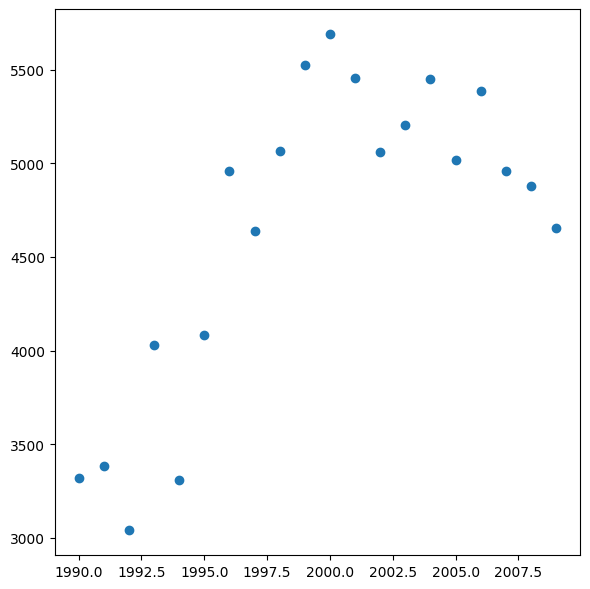

In [ ]:
plt.scatter(years, batting_avg)

In [57]:
print("No trend in home runs over the year, only maybe a positive correlation")

No trend in home runs over the year, only maybe a positive correlation


In [43]:
Obama = [int(var) for var in "$275 $452 $300 $1000 $1000 $500 $100 $1061 $1200 $235 $875 $2000 $350 $210 $250".replace("$", "").split(" ")]
McCain = [int(var) for var in "$50 $75 $240 $302 $250 $700 $350 $500 $1250 $1500 $500 $500 $40 $221 $400".replace("$", "").split(" ")]
print(Obama)
print(McCain)

[275, 452, 300, 1000, 1000, 500, 100, 1061, 1200, 235, 875, 2000, 350, 210, 250]
[50, 75, 240, 302, 250, 700, 350, 500, 1250, 1500, 500, 500, 40, 221, 400]


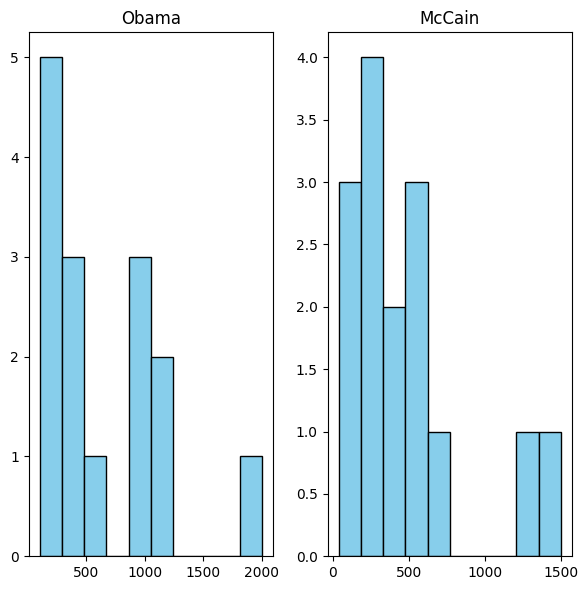

In [44]:
figure, axis = plt.subplots(1, 2)

axis[0].hist(Obama, bins=10, color='skyblue', edgecolor='black')
axis[0].set_title("Obama")
axis[1].hist(McCain, bins=10, color='skyblue', edgecolor='black')
axis[1].set_title("McCain")

plt.tight_layout()  # To avoid overlap between the subplots
plt.show()

In [58]:
print("The data does not seem to favor either candidates, the only thing to learn is that Obama's contributions got him more money overall")

The data does not seem to favor either candidates, the only thing to learn is that Obama's contributions got him more money overall


In [45]:
cookie_avg = [int(var) for var in "22 22 26 24 23 27 25 20 24 26 25 25 19 24 20 22 24 25 25 20 23 30 26 20 25 28 19 26 26 23 25 23 23 23 22 26 27 23 28 24".split(" ")]
print(cookie_avg)

[22, 22, 26, 24, 23, 27, 25, 20, 24, 26, 25, 25, 19, 24, 20, 22, 24, 25, 25, 20, 23, 30, 26, 20, 25, 28, 19, 26, 26, 23, 25, 23, 23, 23, 22, 26, 27, 23, 28, 24]


In [46]:
def mean(items:list):
    return_value = 0.0
    for things in items:
        return_value += float(things/len(items))
    return return_value

In [47]:
def median(items:list):
    if len(items) % 2 == 0:
        #print("List of set: ", Set, " Middle set: ", Set[len(Set)//2], Set[len(Set)//2 + 1])
        temp = items[len(items)//2] + items[len(items)//2 + 1]
        temp = float(temp/2)
        return temp
    else:
        return items[len(items)//2 + 1] 


In [48]:
def std_dev(items:list):
    x_bar = mean(items)
    n = len(items)
    Sum = 0
    #print(x_bar, n)
    for item in items:
        Sum += (item - x_bar)**2/(n-1)
    return math.pow(Sum, 0.5)

In [49]:
print("Mean : %s"%str(mean(cookie_avg)))
print("Meadian : %s"%str(median(cookie_avg)))
print("Standard deviation : %s"%str(std_dev(cookie_avg)))

Mean : 23.949999999999992
Meadian : 26.5
Standard deviation : 2.551520411491237


In [50]:
sorted_cookie = sorted(cookie_avg)
percentile = 0.0
for items in sorted_cookie:
    if items < 23:
        percentile += 1
    elif items >= 23:
        break
percentile = (percentile/len(sorted_cookie))*100
print("Percentile of 23 chip cookies", percentile, "%")

Percentile of 23 chip cookies 25.0 %


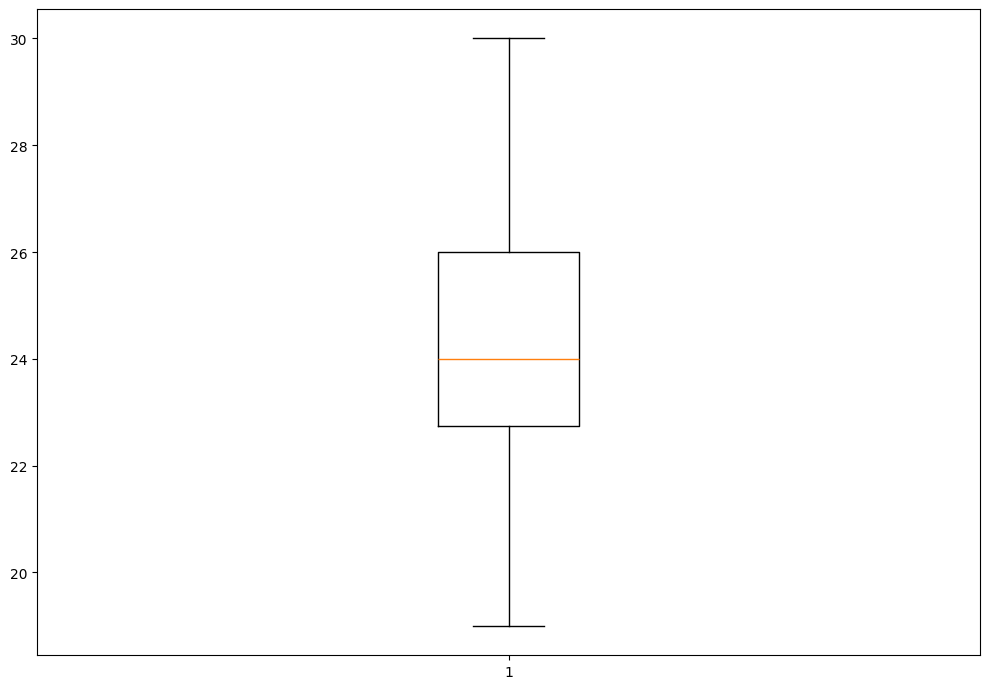

In [51]:
fig = plt.figure(figsize= (10, 7))
plt.boxplot(sorted_cookie)
plt.show()

In [52]:
import pandas as pd
dataframe = pd.read_csv("E:\\Masters Data Analytics\\MSDA-class-work\\DATA-202\\Assignments\\Assignment 1\\patient_data.csv")
dataframe.head

<bound method NDFrame.head of      age        BMI  smoking_status  genetic_risk  diabetes
0     64  29.722920               0             2         0
1     67  35.121296               0             3         0
2     20  39.112930               0             3         0
3     23  21.022390               0             2         0
4     23  20.800589               0             0         1
..   ...        ...             ...           ...       ...
995   57  36.675337               0             3         0
996   61  35.227835               1             3         0
997   37  25.111939               1             0         1
998   36  37.327384               0             1         1
999   68  19.419407               1             3         0

[1000 rows x 5 columns]>

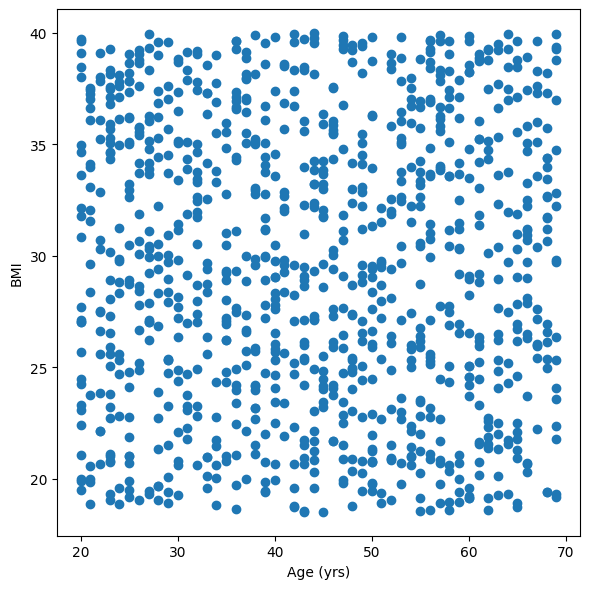

In [53]:
bmi = dataframe['BMI'].to_list()
age = dataframe['age'].to_list()

plt.xlabel("Age (yrs)")
plt.ylabel("BMI")
plt.scatter(age, bmi)

In [ ]:
print("There is no correlation between BMI and age")

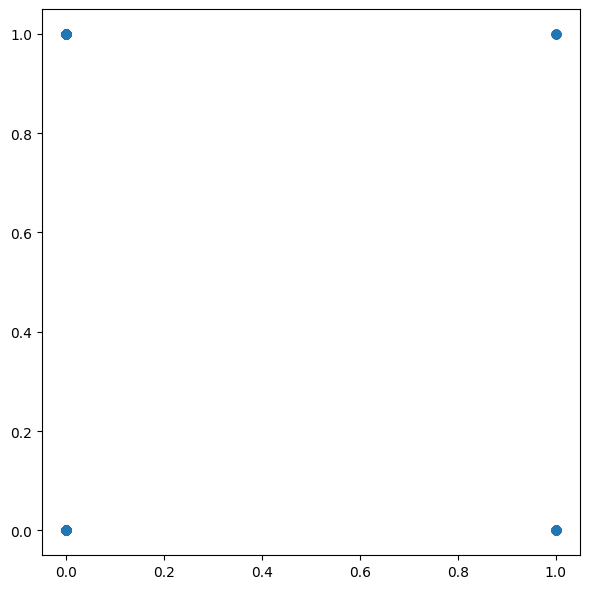

In [54]:
diabetes_num = dataframe['diabetes'].to_list()
smoking_num = dataframe['smoking_status'].to_list()
plt.scatter(diabetes_num, smoking_num)

In [59]:
print("Smoking and diabetes are independent of each other based on the data")

Smoking and diabetes are independent of each other based on the data


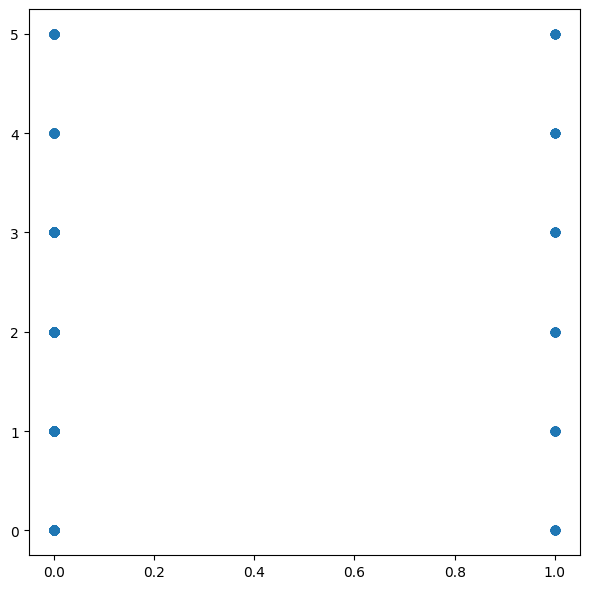

In [55]:
genetic_num = dataframe['genetic_risk'].to_list()
plt.scatter(diabetes_num, genetic_num)

In [60]:
print("There is no correlation between genetic risks and diabetes so they are independent.")

There is no correlation between genetic risks and diabetes so they are independent.


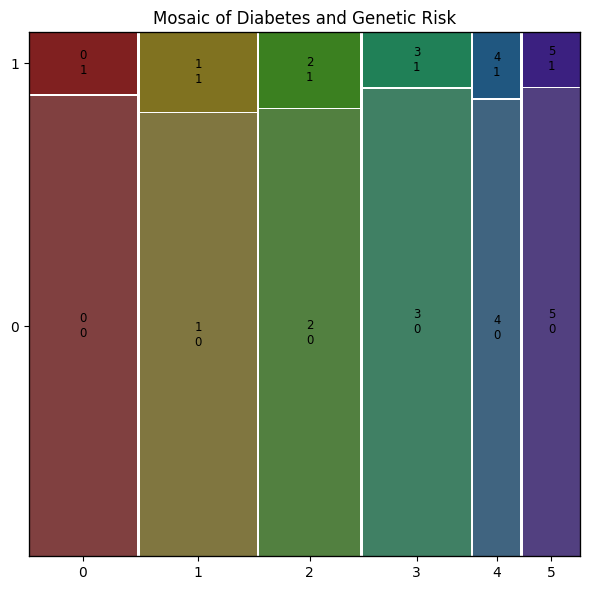

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

dataframe['genetic_risk'] = dataframe['genetic_risk'].astype(str)
dataframe['diabetes'] = dataframe['diabetes'].astype(str)

data = dataframe.groupby(['genetic_risk', 'diabetes']).size().unstack(fill_value=0)

data_dict = {(str(k1), str(k2)): v for k1, row in data.iterrows() for k2, v in row.items()}

plt.rcParams["figure.figsize"] = [6, 6]

mosaic(data_dict, title="Mosaic of Diabetes and Genetic Risk")
plt.show()